In [1]:
#Importing libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
#loading the train data and test data
train=pd.read_csv("Dataset/Train.csv")
test=pd.read_csv("Dataset/Test.csv")

In [3]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [4]:
train=train.dropna(subset=['Service'])

In [5]:
#finding categoritcal features
numeric_columns=train._get_numeric_data().columns
categorical_columns=list(set(train.columns)-set(numeric_columns))
categorical_columns.remove('Result')
categorical_columns

['Protocol_type', 'Flag', 'Service']

In [6]:
#converting categorical values into numeric 
#can be done in this way as well
#from sklearn import preprocessing
#label_encoder=preprocessing.LabelEncoder()
#train['Flag']=label_encoder.fit_transform(train['Flag'])
train.Protocol_type=train.Protocol_type.map({"tcp":0,"udp":1,"icmp":2})
train.Service=train.Service.map({"ftp_data":0,"other":1,"private":2,"http":3,"remote_job":4,"name":5,"netbios_dgm":6,"eco_i":7,"mtp":8,"telnet":9,"finger":10,"domain_u":11,"supdup":12,"uucp_path":13,"Z39_50":14,"smtp":15,"csnet_ns":16,"uucp":17,"netbios_dgm":18,"urp_i":19,"auth":20,"domain":21,"ftp":22,"bgp":23,"ldap":24,"ecr_i":25,"gopher":26,"vmnet":27,"systat":28,"http_433":29,"efs":30,"whois":31,"imap4":32,"iso_tsap":33,"echo":34,"klogin":35,"link":36,"sunrpc":37,"login":38,"kshell":39,"sql_net":40,"time":41,"hostnames":42,"exec":43,"ntp_u":44,"discard":45,"nntp":46,"courier":47,"ctf":48,"ssh":49,"daytime":50,"shell":51,"netstat":52,"pop3":53,"nnsp":54,"IRC":55,"pop_2":56,"printer":57,"tim_i":58,"pm_dump":59,"red_i":60,"netbios_ssn":61,"rje":62,"X11":63,"urh_i":64,"http_8001":65,"aol":66,"http_2784":67,"tftp_u":68,"harvest":69})
train.Flag=train.Flag.map({"SF":0,"S0":1,"REJ":2,"RSTR":3,"SH":4,"RSTO":5,"S1":6,"RSTOS0":7,"S3":8,"S2":9,"OTH":10})

In [7]:
predictors = train[train.columns.difference(['Result'])]

In [8]:
#allocating the targeted columns
X=predictors.values
#assigning target variable
Y=train.Result

In [9]:
#using train_test_split function from sklearn to divide the train dataset
#importing library
from sklearn.model_selection import train_test_split

In [10]:
#split the data into train and cross validation 
#same train and test sets across different executions hence random_state=0.
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [11]:
#shaping the dimension of the data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((88181, 41), (37792, 41), (88181,), (37792,))

In [12]:
#importing decision tree and accuracy_score from sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [13]:

np.isnan(X_train).sum()


np.isinf(X_train).sum()


0

In [14]:
X_train = np.nan_to_num(X_train.astype(np.float32))
X_test = np.nan_to_num(X_test.astype(np.float32))

In [15]:
X_train=X_train.astype(np.uint8)
X_test=X_test.astype(np.uint8)

In [16]:
#fit the model
kmeans=KMeans().fit(X_train)

In [17]:
#X_test = test[predictors].values
predicted= kmeans.predict(X_test)

In [18]:
kmeans.labels_

array([0, 7, 2, ..., 0, 0, 1])

In [19]:
print("the inertial is ", kmeans.inertia_)

the inertial is  810854496.8664671


In [20]:
no_of_clusters=range(2,20)
inertia=[]


for f in no_of_clusters:
    kmeans=KMeans(n_clusters=f,random_state=2)
    kmeans=KMeans().fit(X_train)
    u=kmeans.inertia_
    inertia.append(u)
    print("the inertia for ",f,"cluster is",u)

the inertia for  2 cluster is 810854494.3684995
the inertia for  3 cluster is 810854497.63539
the inertia for  4 cluster is 810854479.7309077
the inertia for  5 cluster is 810854494.5707896
the inertia for  6 cluster is 810854482.7221379
the inertia for  7 cluster is 810854562.5729429
the inertia for  8 cluster is 810854552.8053241
the inertia for  9 cluster is 810854499.6778497
the inertia for  10 cluster is 810854608.703269
the inertia for  11 cluster is 810854480.1383449
the inertia for  12 cluster is 810854476.5931315
the inertia for  13 cluster is 810854526.3033272
the inertia for  14 cluster is 810854681.7070704
the inertia for  15 cluster is 810854527.0157044
the inertia for  16 cluster is 810854584.9628356
the inertia for  17 cluster is 810854497.63539
the inertia for  18 cluster is 810854564.9310325
the inertia for  19 cluster is 810854506.822631


Text(0, 0.5, 'Inertia')

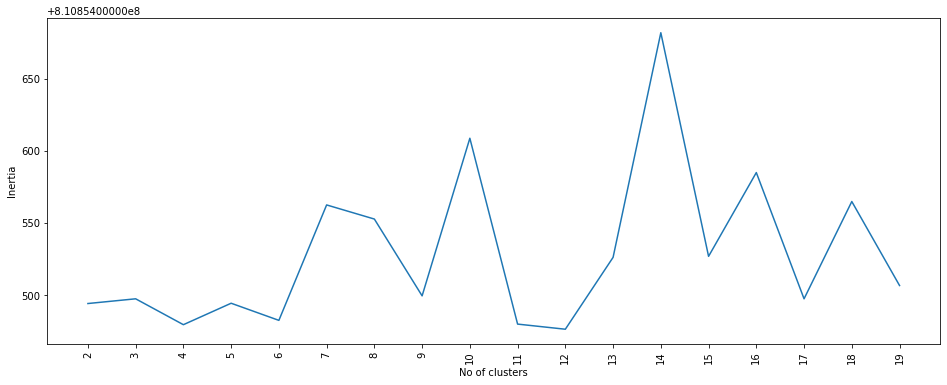

In [21]:
#elbow method
fig, (ax1)=plt.subplots(1,figsize=(16,6))
xx=np.arange(len(no_of_clusters))
ax1.plot(xx,inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters,rotation="vertical")
plt.xlabel("No of clusters")
plt.ylabel("Inertia")

In [22]:
kmeans1=KMeans(n_clusters=8).fit(X_train)

In [23]:
a=kmeans1.labels_

In [24]:
a

array([0, 1, 6, ..., 0, 0, 5])

In [25]:
centroids=kmeans1.cluster_centers_

In [26]:
prediction= kmeans1.predict(X_test)

In [27]:
prediction[prediction == 0]

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
indices0 = np.where(prediction==0)
indices1 = np.where(prediction==1)
indices2 = np.where(prediction==2)
indices3 = np.where(prediction==3)
indices4 = np.where(prediction==4)
indices5 = np.where(prediction==5)
indices6 = np.where(prediction==6)
indices7 = np.where(prediction==7)

In [29]:
indices_list0 = list(indices0)
indices_list1 = list(indices1)
indices_list2 = list(indices2)
indices_list3 = list(indices3)
indices_list4 = list(indices4)
indices_list5 = list(indices5)
indices_list6 = list(indices6)
indices_list7 = list(indices7)

indices_list_final0 = indices_list0[0]
indices_list_final1 = indices_list1[0]
indices_list_final2 = indices_list2[0]
indices_list_final3 = indices_list3[0]
indices_list_final4 = indices_list4[0]
indices_list_final5 = indices_list5[0]
indices_list_final6 = indices_list6[0]
indices_list_final7 = indices_list7[0]


In [30]:
data0 = []
for i in range(len(indices_list_final0)):
    data0.append(X_test[i,:])
print(data0)    

[array([  1,   0, 253,  13,   0,   0,   1,   0,   0,   0, 255,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1,   0,   3, 206,   2,   1,   0,   0,   0,
         0,   0], dtype=uint8), array([  5,   0, 191, 255,   0,   0,   0,   0,   0,   0, 243,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1,   0,   3, 239,   5,   0,   0,   0,   0,
         0,   0], dtype=uint8), array([  1,   0, 186, 255,   0,   0,   0,   0,   0,   0, 121,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1,   0,  15, 247,   1,   0,   0,   0,   0,
         0,   0], dtype=uint8), array([121,   0,   0, 255,   0,   1,   0,   0,   0,   0,   8,   1,   0,
         0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,  47,   0,   8,   0,   1,   0,   0,
         0,   0], dtype=uint8), array([

In [31]:
labels0 = []
for i in range(len(indices_list_final0)):
    labels0.append(y_test.to_numpy()[i])
print(labels0)    

['normal', 'normal', 'normal', 'neptune', 'satan', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'portsweep', 'neptune', 'neptune', 'neptune', 'satan', 'normal', 'normal', 'normal', 'satan', 'satan', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'portsweep', 'normal', 'normal', 'normal', 'normal', 'satan', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'normal', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'normal', 'warezclient', 'normal', 'portsweep', 'neptune', 'neptune', 'normal', 'satan', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'normal', 'smurf', 'normal', 'normal', 'neptune', 'portsweep', 'satan', 'back', 'neptune', 'satan', 'normal', 'normal', 'normal', 'normal', 'neptune', 'normal', 'portsweep', 'normal', 'normal', 'normal', 'neptune', 'nmap', 'neptune', 'neptune', 'neptune', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'n

In [32]:
labels1 = []
for i in range(len(indices_list_final1)):
    labels1.append(y_test.to_numpy()[i])
print(labels1)    

['normal', 'normal', 'normal', 'neptune', 'satan', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'portsweep', 'neptune', 'neptune', 'neptune', 'satan', 'normal', 'normal', 'normal', 'satan', 'satan', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'portsweep', 'normal', 'normal', 'normal', 'normal', 'satan', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'normal', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'normal', 'warezclient', 'normal', 'portsweep', 'neptune', 'neptune', 'normal', 'satan', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'normal', 'smurf', 'normal', 'normal', 'neptune', 'portsweep', 'satan', 'back', 'neptune', 'satan', 'normal', 'normal', 'normal', 'normal', 'neptune', 'normal', 'portsweep', 'normal', 'normal', 'normal', 'neptune', 'nmap', 'neptune', 'neptune', 'neptune', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'n

In [33]:
labels2 = []
for i in range(len(indices_list_final2)):
    labels2.append(y_test.to_numpy()[i])
print(labels2)    

['normal', 'normal', 'normal', 'neptune', 'satan', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'portsweep', 'neptune', 'neptune', 'neptune', 'satan', 'normal', 'normal', 'normal', 'satan', 'satan', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'portsweep', 'normal', 'normal', 'normal', 'normal', 'satan', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'normal', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'normal', 'warezclient', 'normal', 'portsweep', 'neptune', 'neptune', 'normal', 'satan', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'normal', 'smurf', 'normal', 'normal', 'neptune', 'portsweep', 'satan', 'back', 'neptune', 'satan', 'normal', 'normal', 'normal', 'normal', 'neptune', 'normal', 'portsweep', 'normal', 'normal', 'normal', 'neptune', 'nmap', 'neptune', 'neptune', 'neptune', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'n

In [34]:
labels3 = []
for i in range(len(indices_list_final3)):
    labels3.append(y_test.to_numpy()[i])
print(labels3)    

['normal', 'normal', 'normal', 'neptune', 'satan', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'portsweep', 'neptune', 'neptune', 'neptune', 'satan', 'normal', 'normal', 'normal', 'satan', 'satan', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'portsweep', 'normal', 'normal', 'normal', 'normal', 'satan', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'normal', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'normal', 'warezclient', 'normal', 'portsweep', 'neptune', 'neptune', 'normal', 'satan', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'normal', 'smurf', 'normal', 'normal', 'neptune', 'portsweep', 'satan', 'back', 'neptune', 'satan', 'normal', 'normal', 'normal', 'normal', 'neptune', 'normal', 'portsweep', 'normal', 'normal', 'normal', 'neptune', 'nmap', 'neptune', 'neptune', 'neptune', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'n

In [35]:
labels4 = []
for i in range(len(indices_list_final4)):
    labels4.append(y_test.to_numpy()[i])
print(labels4)    

['normal', 'normal', 'normal', 'neptune', 'satan', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'portsweep', 'neptune', 'neptune', 'neptune', 'satan', 'normal', 'normal', 'normal', 'satan', 'satan', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'portsweep', 'normal', 'normal', 'normal', 'normal', 'satan', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'normal', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'normal', 'warezclient', 'normal', 'portsweep', 'neptune', 'neptune', 'normal', 'satan', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'normal', 'smurf', 'normal', 'normal', 'neptune', 'portsweep', 'satan', 'back', 'neptune', 'satan', 'normal', 'normal', 'normal', 'normal', 'neptune', 'normal', 'portsweep', 'normal', 'normal', 'normal', 'neptune', 'nmap', 'neptune', 'neptune', 'neptune', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'n

In [36]:
labels5 = []
for i in range(len(indices_list_final5)):
    labels5.append(y_test.to_numpy()[i])
print(labels5)    

['normal', 'normal', 'normal', 'neptune', 'satan', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'portsweep', 'neptune', 'neptune', 'neptune', 'satan', 'normal', 'normal', 'normal', 'satan', 'satan', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'portsweep', 'normal', 'normal', 'normal', 'normal', 'satan', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'normal', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'normal', 'warezclient', 'normal', 'portsweep', 'neptune', 'neptune', 'normal', 'satan', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'normal', 'smurf', 'normal', 'normal', 'neptune', 'portsweep', 'satan', 'back', 'neptune', 'satan', 'normal', 'normal', 'normal', 'normal', 'neptune', 'normal', 'portsweep', 'normal', 'normal', 'normal', 'neptune', 'nmap', 'neptune', 'neptune', 'neptune', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'n

In [37]:
labels6 = []
for i in range(len(indices_list_final6)):
    labels6.append(y_test.to_numpy()[i])
print(labels6)    

['normal', 'normal', 'normal', 'neptune', 'satan', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'portsweep', 'neptune', 'neptune', 'neptune', 'satan', 'normal', 'normal', 'normal', 'satan', 'satan', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'portsweep', 'normal', 'normal', 'normal', 'normal', 'satan', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'normal', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'normal', 'warezclient', 'normal', 'portsweep', 'neptune', 'neptune', 'normal', 'satan', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'normal', 'smurf', 'normal', 'normal', 'neptune', 'portsweep', 'satan', 'back', 'neptune', 'satan', 'normal', 'normal', 'normal', 'normal', 'neptune', 'normal', 'portsweep', 'normal', 'normal', 'normal', 'neptune', 'nmap', 'neptune', 'neptune', 'neptune', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'n

In [38]:
labels7 = []
for i in range(len(indices_list_final7)):
    labels7.append(y_test.to_numpy()[i])
print(labels7)    

['normal', 'normal', 'normal', 'neptune', 'satan', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'portsweep', 'neptune', 'neptune', 'neptune', 'satan', 'normal', 'normal', 'normal', 'satan', 'satan', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'portsweep', 'normal', 'normal', 'normal', 'normal', 'satan', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'normal', 'neptune', 'normal', 'normal', 'normal', 'neptune', 'normal', 'neptune', 'normal', 'warezclient', 'normal', 'portsweep', 'neptune', 'neptune', 'normal', 'satan', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'normal', 'smurf', 'normal', 'normal', 'neptune', 'portsweep', 'satan', 'back', 'neptune', 'satan', 'normal', 'normal', 'normal', 'normal', 'neptune', 'normal', 'portsweep', 'normal', 'normal', 'normal', 'neptune', 'nmap', 'neptune', 'neptune', 'neptune', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'normal', 'n

In [39]:
unique_labels0 = set(labels0)
unique_labels0


{'back',
 'buffer_overflow',
 'ftp_write',
 'guess_passwd',
 'imap',
 'ipsweep',
 'land',
 'neptune',
 'nmap',
 'normal',
 'pod',
 'portsweep',
 'rootkit',
 'satan',
 'smurf',
 'teardrop',
 'warezclient',
 'warezmaster'}

In [40]:
print(labels0.count("back"),labels0.count("imap"),labels0.count("ipsweep"),labels0.count("neptune"),labels0.count("nmap"),labels0.count("normal"),labels0.count("pod"),labels0.count("portsweep"),labels0.count("rootkit"),labels0.count("satan"),labels0.count("smurf"),labels0.count("teardrop"),labels0.count("warezclient"),labels0.count("warezmaster"))

68 1 229 2598 87 4224 15 187 1 222 152 51 60 2


In [41]:
unique_labels1 = set(labels1)
unique_labels1


{'back',
 'ftp_write',
 'guess_passwd',
 'imap',
 'ipsweep',
 'land',
 'neptune',
 'nmap',
 'normal',
 'pod',
 'portsweep',
 'satan',
 'smurf',
 'teardrop',
 'warezclient'}

In [42]:
print(labels1.count("back"),labels1.count("ipsweep"),labels1.count("neptune"),labels1.count("nmap"),labels1.count("normal"),labels1.count("pod"),labels1.count("portsweep"),labels1.count("satan"),labels1.count("smurf"),labels1.count("teardrop"),labels1.count("warezclient"),labels1.count("warezmaster"))

24 99 1149 37 1984 4 77 101 69 22 27 0


In [43]:
unique_labels2 = set(labels2)
unique_labels2


{'back',
 'ftp_write',
 'guess_passwd',
 'ipsweep',
 'land',
 'neptune',
 'nmap',
 'normal',
 'pod',
 'portsweep',
 'satan',
 'smurf',
 'teardrop',
 'warezclient'}

In [44]:
print(labels2.count("back"),labels2.count("ipsweep"),labels2.count("neptune"),labels2.count("nmap"),labels2.count("normal"),labels2.count("pod"),labels2.count("portsweep"),labels2.count("satan"),labels2.count("smurf"),labels2.count("teardrop"),labels2.count("warezclient"),labels2.count("warezmaster"))

16 65 757 25 1310 3 51 68 48 17 20 0


In [45]:
unique_labels3 = set(labels3)
unique_labels3

{'back',
 'ftp_write',
 'guess_passwd',
 'imap',
 'ipsweep',
 'land',
 'neptune',
 'nmap',
 'normal',
 'pod',
 'portsweep',
 'satan',
 'smurf',
 'teardrop',
 'warezclient'}

In [46]:
print(labels3.count("back"),labels3.count("ipsweep"),labels3.count("neptune"),labels3.count("nmap"),labels3.count("normal"),labels3.count("pod"),labels3.count("portsweep"),labels3.count("satan"),labels3.count("smurf"),labels3.count("teardrop"),labels3.count("warezclient"),labels3.count("warezmaster"))

24 86 1036 33 1764 4 68 93 61 21 25 0


In [47]:
unique_labels4 = set(labels4)
unique_labels4

{'back',
 'ftp_write',
 'guess_passwd',
 'imap',
 'ipsweep',
 'land',
 'neptune',
 'nmap',
 'normal',
 'pod',
 'portsweep',
 'satan',
 'smurf',
 'teardrop',
 'warezclient',
 'warezmaster'}

In [48]:
print(labels4.count("back"),labels4.count("imap"),labels4.count("ipsweep"),labels4.count("neptune"),labels4.count("nmap"),labels4.count("normal"),labels4.count("pod"),labels4.count("portsweep"),labels4.count("rootkit"),labels4.count("satan"),labels4.count("smurf"),labels4.count("teardrop"),labels4.count("warezclient"),labels4.count("warezmaster"))

39 1 128 1562 47 2628 8 112 0 137 93 29 42 2


In [49]:
unique_labels5 = set(labels5)
unique_labels5

{'back',
 'ftp_write',
 'guess_passwd',
 'imap',
 'ipsweep',
 'land',
 'neptune',
 'nmap',
 'normal',
 'pod',
 'portsweep',
 'satan',
 'smurf',
 'teardrop',
 'warezclient'}

In [50]:
print(labels5.count("back"),labels5.count("imap"),labels5.count("ipsweep"),labels5.count("neptune"),labels5.count("nmap"),labels5.count("normal"),labels5.count("pod"),labels5.count("portsweep"),labels5.count("rootkit"),labels5.count("satan"),labels5.count("smurf"),labels5.count("teardrop"),labels5.count("warezclient"),labels5.count("warezmaster"))

24 1 94 1127 35 1927 4 73 0 98 66 22 27 0


In [51]:
unique_labels6 = set(labels6)
unique_labels6

{'back',
 'ftp_write',
 'guess_passwd',
 'imap',
 'ipsweep',
 'land',
 'neptune',
 'nmap',
 'normal',
 'pod',
 'portsweep',
 'satan',
 'smurf',
 'teardrop',
 'warezclient'}

In [52]:
print(labels6.count("back"),labels6.count("imap"),labels6.count("ipsweep"),labels6.count("neptune"),labels6.count("nmap"),labels6.count("normal"),labels6.count("pod"),labels6.count("portsweep"),labels6.count("rootkit"),labels6.count("satan"),labels6.count("smurf"),labels6.count("teardrop"),labels6.count("warezclient"),labels6.count("warezmaster"))

31 1 109 1260 38 2172 7 91 0 109 74 25 30 0


In [53]:
unique_labels7 = set(labels7)
unique_labels7

{'back',
 'buffer_overflow',
 'ftp_write',
 'guess_passwd',
 'imap',
 'ipsweep',
 'land',
 'neptune',
 'nmap',
 'normal',
 'pod',
 'portsweep',
 'rootkit',
 'satan',
 'smurf',
 'teardrop',
 'warezclient',
 'warezmaster'}

In [54]:
print(labels7.count("back"),labels7.count("imap"),labels7.count("ipsweep"),labels7.count("neptune"),labels7.count("nmap"),labels7.count("normal"),labels7.count("pod"),labels7.count("portsweep"),labels7.count("rootkit"),labels7.count("satan"),labels7.count("smurf"),labels7.count("teardrop"),labels7.count("warezclient"),labels7.count("warezmaster"))

74 1 241 2763 90 4468 15 200 1 234 166 54 62 2


In [55]:

from sklearn.metrics import silhouette_score
SS=silhouette_score(X_test,prediction)
SS


0.3982797392026995

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [57]:
X_train.shape,a.shape

((88181, 41), (88181,))

In [58]:
A_train,A_test,B_train,B_test=train_test_split(X_train,a,test_size=0.3,random_state=0)

In [59]:
A_train.shape,A_test.shape,B_train.shape,B_test.shape

((61726, 41), (26455, 41), (61726,), (26455,))

In [60]:
random_forest=RandomForestClassifier()
random_forest.fit(A_train,B_train)

RandomForestClassifier()

In [61]:
supervised_predicted=random_forest.predict(A_test)

In [62]:
type(supervised_predicted)

numpy.ndarray

In [63]:
supervised_predicted.shape

(26455,)

In [64]:
accuracy_score(B_test,supervised_predicted)

0.991003591003591

In [65]:
C_train,C_test,D_train,D_test=train_test_split(data0,labels0,test_size=0.3,random_state=0)

In [66]:
random_forest0=RandomForestClassifier()
random_forest0.fit(C_train,D_train)

RandomForestClassifier()

In [67]:
supervised_predicted0=random_forest0.predict(C_test)

In [68]:
accuracy_score(D_test,supervised_predicted0)

0.9873577749683944

In [69]:
print(metrics.classification_report(D_test,supervised_predicted0,))
confusion_matrix=metrics.confusion_matrix(D_test,supervised_predicted0)

              precision    recall  f1-score   support

        back       1.00      0.96      0.98        23
guess_passwd       1.00      1.00      1.00         1
     ipsweep       0.91      0.93      0.92        72
     neptune       0.99      1.00      1.00       762
        nmap       0.71      0.67      0.69        18
      normal       0.99      1.00      1.00      1291
         pod       1.00      0.83      0.91         6
   portsweep       0.90      0.98      0.94        48
       satan       0.98      0.83      0.90        64
       smurf       1.00      1.00      1.00        50
    teardrop       1.00      1.00      1.00        18
 warezclient       0.94      0.85      0.89        20

    accuracy                           0.99      2373
   macro avg       0.95      0.92      0.93      2373
weighted avg       0.99      0.99      0.99      2373

